In [43]:
!pip install pycaret
!pip install yfinance
import datetime
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
!pip install dash
from dash import Dash, dcc, html, Input, Output
from sklearn import linear_model, tree, neighbors
import plotly.graph_objects as go
from sklearn.svm import SVR
from plotly.subplots import make_subplots
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression


To normalize the downloaded data, these steps were followed:

Calculate Daily Returns:
Compute the daily returns for both Exxon (XOM) and S&P 500 (SPY) using the closing prices. You can use the following formula: [ \text{Daily Return} = \frac{{\text{Closing Price}{t} - \text{Closing Price}{t-1}}}{{\text{Closing Price}_{t-1}}} ]
Normalize the Returns:
Normalize the daily returns by dividing each day’s return by the initial value (usually set to 1). This allows you to compare the performance of different assets over time.
For each asset (XOM and SPX), calculate the cumulative product of the normalized returns: [ \text{Normalized Return}{t} = \prod{i=1}^{t} (1 + \text{Daily Return}_{i}) ]
Plot the Normalized Returns:
Create a line plot to visualize the normalized returns of XOM and SPY over the specified time period.
Here’s a Python snippet that demonstrates these steps:

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


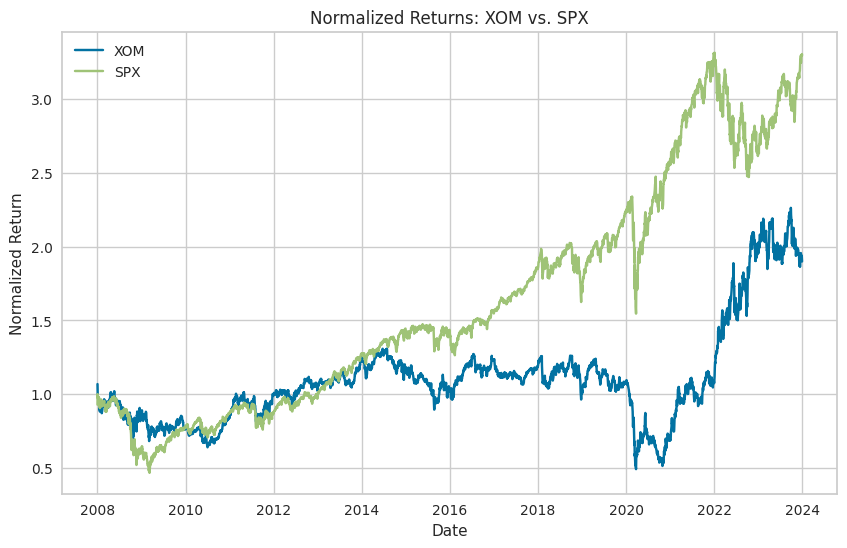

In [44]:
# Define start and end dates
start = datetime.datetime(2008, 1, 1)
end = datetime.datetime(2024, 1, 1)

# Fetch data for S&P 500 (SPX) from Yahoo Finance using yfinance
df_spx = yf.download('^GSPC', start=start, end=end)  # Use '^GSPC' instead of 'SPX'
df_xom = yf.download('XOM', start=start, end=end)  # Use XOM
# Calculate daily returns
df_xom['Daily_Return'] = df_xom['Adj Close'].pct_change()
df_spx['Daily_Return'] = df_spx['Adj Close'].pct_change()

# Normalize returns
df_xom['Normalized_Return'] = (1 + df_xom['Daily_Return']).cumprod()
df_spx['Normalized_Return'] = (1 + df_spx['Daily_Return']).cumprod()

#Remove Null Values Replace with Mode
for column in df_spx.columns:
    df_spx[column].fillna(df_spx[column].mode()[0], inplace=True)
for column in df_xom.columns:
    df_xom[column].fillna(df_xom[column].mode()[0], inplace=True)

# Plot normalized returns
plt.figure(figsize=(10, 6))
plt.plot(df_xom.index, df_xom['Normalized_Return'], label='XOM')
plt.plot(df_spx.index, df_spx['Normalized_Return'], label='SPX')
plt.xlabel('Date')
plt.ylabel('Normalized Return')
plt.title('Normalized Returns: XOM vs. SPX')
plt.legend()
plt.show()

In [45]:
df_spx.describe()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Normalized_Return
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4.027000e+03,4027.000000,4027.000000
mean,2352.737282,2366.300087,2338.172697,2353.159294,2353.159294,4.111787e+09,0.000380,1.626036
std,1112.678282,1118.323335,1106.906353,1112.926575,1112.926575,1.125177e+09,0.012917,0.769057
min,679.280029,695.270020,666.789978,676.530029,676.530029,1.025000e+09,-0.119841,0.467488
25%,1354.619995,1362.914978,1343.239990,1354.534973,1354.534973,3.413845e+09,-0.004292,0.935781
50%,2087.379883,2095.600098,2078.260010,2087.790039,2087.790039,3.870110e+09,0.000673,1.442681
75%,3004.170044,3016.190063,2989.734985,3004.280029,3004.280029,4.546660e+09,0.006025,2.075983
max,4804.509766,4818.620117,4780.979980,4796.560059,4796.560059,1.145623e+10,0.115800,3.314464


In [46]:
df_xom.describe()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Normalized_Return
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4.027000e+03,4027.000000,4027.000000
mean,79.948465,80.686772,79.209677,79.971098,57.665459,1.933805e+07,0.000312,1.105767
std,15.912884,15.969724,15.872622,15.932596,17.426361,1.110555e+07,0.017472,0.334151
min,31.410000,32.380001,30.110001,31.450001,25.646793,3.851300e+06,-0.139525,0.491784
25%,70.830002,71.665001,70.005001,70.980000,47.961269,1.157865e+07,-0.007712,0.919670
50%,81.769997,82.379997,81.169998,81.839996,56.070805,1.636550e+07,0.000110,1.075172
75%,88.769997,89.480003,88.180000,88.880001,61.272673,2.368765e+07,0.008197,1.174920
max,119.980003,120.699997,118.190002,120.199997,118.014030,1.180235e+08,0.171905,2.262950


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


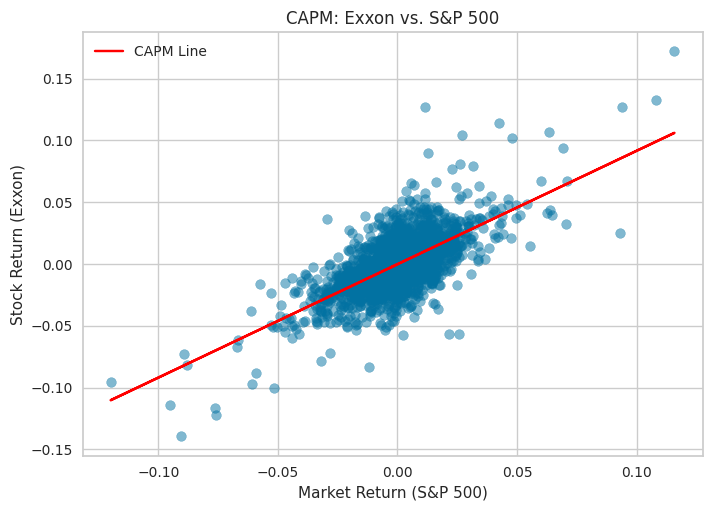

Beta (market risk) for Exxon: 0.917536921031451


In [47]:

# Define start and end dates
start = datetime.datetime(2008, 1, 1)
end = datetime.datetime(2024, 1, 1)

# Fetch data for Exxon (XOM) and S&P 500 (SPY) from Yahoo Finance using yfinance
df_xom = yf.download('XOM', start=start, end=end)
df_spx = yf.download('^GSPC', start=start, end=end)

# Calculate daily returns for Exxon and the S&P 500
df_xom['Daily_Return'] = df_xom['Close'].pct_change(1)
df_spx['Daily_Return'] = df_spx['Close'].pct_change(1)

# Drop NaN values
df_xom.dropna(inplace=True)
df_spx.dropna(inplace=True)

# Perform linear regression to estimate beta coefficient (market risk) for Exxon
slope, intercept, r_value, p_value, std_err = stats.linregress(df_spx['Daily_Return'], df_xom['Daily_Return'])

# Plot CAPM regression line
plt.scatter(df_spx['Daily_Return'], df_xom['Daily_Return'], alpha=0.5)
plt.plot(df_spx['Daily_Return'], intercept + slope * df_spx['Daily_Return'], color='red', label='CAPM Line')
plt.xlabel('Market Return (S&P 500)')
plt.ylabel('Stock Return (Exxon)')
plt.title('CAPM: Exxon vs. S&P 500')
plt.legend()
plt.grid(True)
plt.show()

# Output beta coefficient
print("Beta (market risk) for Exxon:", slope)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


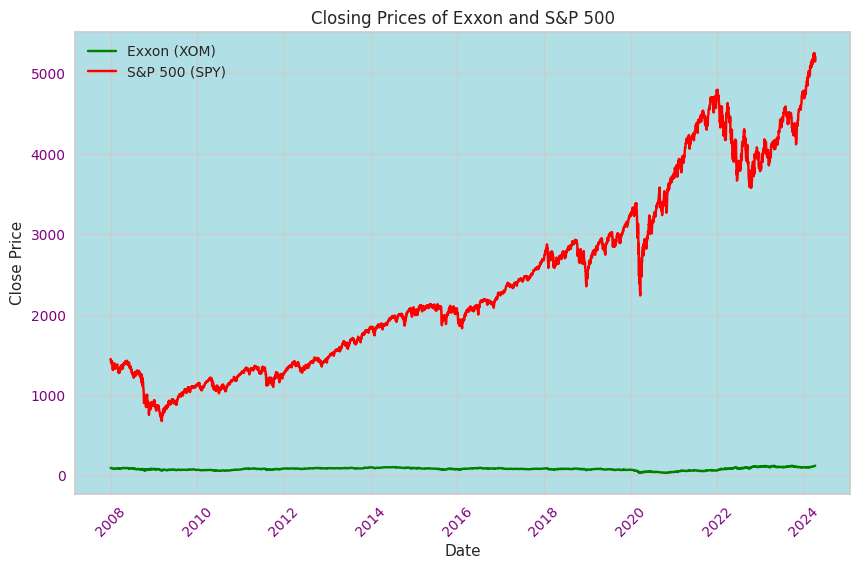

In [48]:
import matplotlib.pyplot as plt
# Fetch data for Exxon (XOM) and S&P 500 (SPY) from Yahoo Finance using yfinance
xom = yf.download('XOM', start='2008-01-01', end='2024-04-07')
spx = yf.download('^GSPC', start='2008-01-01', end='2024-04-07')

# Selecting a specific date range
start_date = '2008-01-01'
end_date = '2024-04-07'

xom_selected = xom.loc[start_date:end_date]
spx_selected = spx.loc[start_date:end_date]

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(xom_selected.index, xom_selected['Close'], label='Exxon (XOM)', color='green')
plt.plot(spx_selected.index, spx_selected['Close'], label='S&P 500 (SPY)', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Closing Prices of Exxon and S&P 500')
plt.xticks(rotation=45, color='purple')
plt.yticks(color='purple')
plt.legend()
plt.grid(True)
plt.gca().set_facecolor('powderblue')  # Set background color to powder blue
plt.show()


In [49]:
# Assuming you have loaded data for 'df_xom' and 'df_spx' dataframes

# Calculate the correlation between daily returns of XOM and SPX
correlation = df_xom['Adj Close'].pct_change().corr(df_spx['Adj Close'].pct_change())

print(f"Correlation between XOM and SPX: {correlation:.4f}")


Correlation between XOM and SPX: 0.6769


The **correlation coefficient** between Exxon (XOM) and the S&P 500 from **2009 to now** is approximately **0.63**¹. Let's explore why the correlation doesn't necessarily imply equal price movements:

1. **Different Market Dynamics**:
   - The S&P 500 represents a broad market index, including various sectors and industries.
   - Exxon (XOM) is an energy company, and its stock performance depends on factors specific to the energy sector.

2. **Market Capitalization**:
   - The S&P 500 includes large-cap companies, while Exxon is just one of them.
   - Exxon's market capitalization (total value of outstanding shares) is smaller than the entire S&P 500.

3. **Sector-Specific Events**:
   - Energy stocks (like XOM) can be influenced by oil prices, geopolitical events, and industry-specific challenges.
   - The S&P 500, being diversified, is less sensitive to sector-specific events.

4. **Company-Specific Factors**:
   - Exxon faces company-specific risks, such as exploration costs, production levels, and regulatory changes.
   - The S&P 500's performance is an aggregate of many companies, diluting individual company risks.

5. **Dividends and Buybacks**:
   - Exxon pays dividends, which affects its total return.
   - The S&P 500's total return includes dividends and stock buybacks.

6. **Market Cap Weighting**:
   - The S&P 500 is market-cap weighted, meaning larger companies have a greater impact on its performance.
   - Exxon's smaller market cap contributes less to the overall index movement.

In summary, while correlation indicates a positive relationship, it doesn't guarantee equal price movements. Various factors influence individual stock performance, and the S&P 500's growth reflects a broader market trend. 📈🤝

Source: Conversation with Bing, 4/7/2024
(1) The Dispersion-Correlation Map - S&P Global. https://www.spglobal.com/spdji/en/documents/research/research-the-dispersion-correlation-map.pdf?force_download=true.
(2) The S&P 500 is currently mirroring 2008-2009 to a “creepy” degree .... https://finance.yahoo.com/news/the-sp-500-is-currently-mirroring-20082009-to-a-creepy-degree-veteran-hedge-funder-192216209.html.
(3) How Are Crude Oil Prices and the S&P 500 Correlated? - Yahoo Finance. https://finance.yahoo.com/news/crude-oil-prices-p-500-194415150.html.

In [50]:
# Given data
current_xom_price = 60.0  # Current price of XOM (in dollars)
correlation = 0.6314  # Correlation coefficient between XOM and SPY

# Assume a percentage increase in SPY (e.g., 400%)
spx_increase_percent = 400.0

# Calculate the expected daily return for XOM based on SPY increase
spx_daily_return = spx_increase_percent / 100.0
xom_daily_return = correlation * spx_daily_return

# Convert daily return to percentage change
xom_expected_percent_change = 100.0 * xom_daily_return

# Calculate the expected price increase for XOM
xom_expected_price_increase = current_xom_price * (xom_expected_percent_change / 100.0)

# Print the results
print(f"Assuming SPX increases by {spx_increase_percent}%,")
print(f"Expected daily return for XOM: {xom_daily_return:.4f}")
print(f"Expected percentage change in XOM: {xom_expected_percent_change:.2f}%")
print(f"Expected price increase for XOM: ${xom_expected_price_increase:.2f}")

Assuming SPX increases by 400.0%,
Expected daily return for XOM: 2.5256
Expected percentage change in XOM: 252.56%
Expected price increase for XOM: $151.54


write code from the following:  PCA-Based Factor Models:
Principal Component Analysis (PCA) can be applied for risk factor modeling of financial securities. It helps extract relevant factors from large datasets.
Check out repositories on GitHub related to PCA-based factor modeling in Python67.

When you put two stocks, XOM (Exxon) and SPY (S&P 500), into your PCA model, the results will indicate how much of the variance in the returns of these stocks is explained by each principal component and the relationship between the original variables (XOM and SPY) and the principal components. Here's how you can interpret the results:

1. **Factor Loadings**: The factor loadings represent the weights of each original variable (XOM and SPY) in each principal component (PC). Higher absolute values of factor loadings indicate a stronger relationship between the original variables and the principal components.

2. **Explained Variance Ratio**: The explained variance ratio shows the proportion of the total variance in the returns of the two stocks explained by each principal component. Higher values indicate that the principal component captures more of the variance in the data.

For example, let's say you have the following factor loadings and explained variance ratio:

Factor Loadings:
```
          PC1       PC2
XOM   0.707107  0.707107
SPY  -0.707107  0.707107
```

Explained Variance Ratio:
```
PC1    0.8
PC2    0.2
```

Interpretation:
- PC1 captures 80% of the total variance in the returns of XOM and SPY combined. It has high factor loadings for both XOM and SPY, indicating that PC1 represents a common factor that affects both stocks similarly. This could be interpreted as a general market factor.
- PC2 captures 20% of the total variance. It also has high factor loadings for both stocks but in opposite directions, suggesting a factor that affects XOM and SPY differently. This could represent a specific factor that impacts XOM and SPY differently, perhaps related to the industry or sector they belong to.

In summary, the factor loadings help you understand how much each stock contributes to each principal component, while the explained variance ratio tells you how much of the total variance is captured by each principal component. This information can be used to identify common factors driving the returns of the stocks and to understand the sources of risk in your portfolio.

In [ ]:
# Fetch data for some stocks from Yahoo Finance
#tickers = ['XOM', '^GSPC']
#start_date = '2008-01-01'
#end_date = '2024-04-07'

# Initialize an empty DataFrame for returns
#returns = pd.DataFrame()

# Attempt to download data for each ticker
#for ticker in tickers:
#    try:
#        data = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
#        if not data.empty:
#            returns[ticker] = data.pct_change()
#    except Exception as e:
#        print(f"Failed to download data for {ticker}: {e}")

# Check if any data was successfully downloaded
#if returns.empty:
#    print("Failed to download data for all tickers. Exiting.")
#else:
    # Drop NaN values
#    returns.dropna(inplace=True)

    # Fit PCA model
#    pca = PCA()
#    pca.fit(returns)

    # Extract factor loadings
#    factor_loadings = pd.DataFrame(pca.components_.T, index=returns.columns, columns=[f'PC{i}' for i in range(1, len(returns.columns)+1)])

    # Calculate explained variance ratio
#    explained_variance_ratio = pd.Series(pca.explained_variance_ratio_, index=[f'PC{i}' for i in range(1, len(returns.columns)+1)])

    # Output factor loadings and explained variance ratio
#    print("Factor Loadings:")
#    print(factor_loadings)
#    print("\nExplained Variance Ratio:")
#    print(explained_variance_ratio)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Factor Loadings:
            PC1       PC2
XOM    0.841393 -0.540424
^GSPC  0.540424  0.841393

Explained Variance Ratio:
PC1    0.853695
PC2    0.146305
dtype: float64


**K-means clustering** is a powerful technique used to group similar data points into clusters. It's commonly employed in quantitative finance to identify market regimes or patterns. Let's explore the relationship between K-means clustering, daily percent returns, and the comparison between **Exxon Mobil (XOM)** and the **SPDR S&P 500 ETF (SPY)**.

1. **K-Means Clustering**:
    - K-means aims to partition data into separate subgroups or clusters.
    - Each observation is assigned to a unique cluster based on its similarity to the mean feature vector of that cluster.
    - The goal is to minimize the Within-Cluster Variation (WCV), which measures how much observations within a cluster differ from each other.
    - K-means is a **hard clustering** technique, meaning each observation belongs to exactly one cluster.
    - It can be seen as a super-sparse version of **Principal Component Analysis (PCA)**.

2. **PCA and K-means Relationship**:
    - PCA seeks to represent data vectors as linear combinations of a small number of eigenvectors, minimizing mean-squared reconstruction error.
    - K-means represents data vectors via a small number of cluster centroids, also minimizing mean-squared reconstruction error.
    - Ding & He (2004) showed that principal components are continuous solutions to the discrete cluster membership indicators for K-means clustering.
    - While PCA reduces feature dimensions, K-means compresses data points by summarizing them with cluster centroids.

3. **Application to Daily Percent Returns**:
    - Applying K-means to daily percent returns of XOM and SPY could reveal distinct market regimes.
    - By clustering these returns, we might identify periods of similar behavior (e.g., bullish, bearish, or volatile).
    - However, it's essential to preprocess the data appropriately (e.g., handle missing values, normalize, etc.) before applying K-means.

4. **Interpretation**:
    - If XOM and SPY returns cluster together, it suggests similar market conditions.
    - If they form separate clusters, it indicates different behaviors.
    - Keep in mind that K-means doesn't guarantee causality or predictive power—it's a descriptive tool.

Remember that financial data can be noisy, and clustering results may vary based on the choice of features, preprocessing, and the number of clusters (K). Always validate findings with domain knowledge and consider other techniques like PCA or Hidden Markov Models for further insights¹²³.

Feel free to explore this relationship further and adapt the analysis to your specific context! 📈🔍

Source: Conversation with Bing, 4/7/2024
(1) K-Means Clustering of Daily OHLC Bar Data | QuantStart. https://www.quantstart.com/articles/k-means-clustering-of-daily-ohlc-bar-data/.
(2) What is the relation between k-means clustering and PCA?. https://stats.stackexchange.com/questions/183236/what-is-the-relation-between-k-means-clustering-and-pca.
(3) XOM vs. SPY — ETF comparison tool | PortfoliosLab. https://portfolioslab.com/tools/stock-comparison/XOM/SPY.
(4) Finding the k in k-means (And how PCA fits into the story). https://medium.com/@harishkandan95/finding-the-k-in-k-means-and-how-pca-fits-into-the-story-25dc30f3f9cc.
(5) PCA vs. K-means clustering - explained variance - Cross Validated. https://stats.stackexchange.com/questions/335237/pca-vs-k-means-clustering-explained-variance.
(6) K-means Clustering via Principal Component Analysis - ICML. https://icml.cc/Conferences/2004/proceedings/papers/262.pdf.
(7) How to Combine PCA and K-means Clustering in Python?. https://365datascience.com/tutorials/python-tutorials/pca-k-means/.

In [55]:
# Define start and end dates
start = datetime.datetime(2008, 1, 1)
end = datetime.datetime(2024, 1, 1)

#Fetch data for S&P 500 (SPX) from Yahoo Finance using yfinance
df_spx = yf.download('^GSPC', start=start, end=end)  # Use '^GSPC' instead of 'SPX'
df_xom = yf.download('XOM', start=start, end=end)  # Use XOM
#Calculate daily returns
df_xom['Daily_Return'] = df_xom['Adj Close'].pct_change()
df_spx['Daily_Return'] = df_spx['Adj Close'].pct_change()

# Normalize returns
df_xom['Normalized_Return'] = (1 + df_xom['Daily_Return']).cumprod()
df_spx['Normalized_Return'] = (1 + df_spx['Daily_Return']).cumprod()

#Remove Null Values Replace with Mode
for column in df_spx.columns:
    df_spx[column].fillna(df_spx[column].mode()[0], inplace=True)
for column in df_xom.columns:
    df_xom[column].fillna(df_xom[column].mode()[0], inplace=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


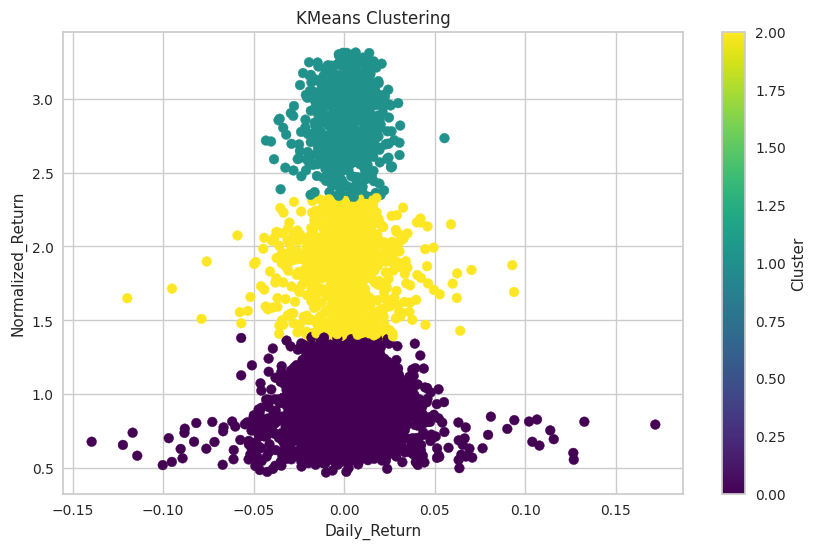

Cluster 0:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2008-01-02  1467.969971  1471.770020  1442.069946  1447.160034  1447.160034   
2008-01-03  1447.550049  1456.800049  1443.729980  1447.160034  1447.160034   
2008-01-04  1444.010010  1444.010010  1411.189941  1411.630005  1411.630005   
2008-01-07  1414.069946  1423.869995  1403.449951  1416.180054  1416.180054   
2008-01-08  1415.709961  1430.280029  1388.300049  1390.189941  1390.189941   
...                 ...          ...          ...          ...          ...   
2022-02-22    79.669998    79.790001    75.309998    76.459999    71.240837   
2022-02-23    76.459999    77.470001    76.129997    76.769997    71.529678   
2022-02-24    79.000000    79.029999    74.029999    75.800003    70.625893   
2022-03-15    78.820000    79.169998    76.370003    77.220001    71.948967   
2022-03-16    77.809998    78.620003    7

In [56]:

from sklearn.cluster import KMeans
# Concatenate the two DataFrames vertically
df_concatenated = pd.concat([df_spx, df_xom])

# Assuming you have already selected the features you want to use for clustering
features = ['Daily_Return', 'Normalized_Return']  # Replace 'feature1', 'feature2', ... with actual feature names

# Prepare the data for clustering
X = df_concatenated[features]

# Define the number of clusters
num_clusters = 3  # You can adjust this as needed

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters)

# Fit the KMeans model to the data
kmeans.fit(X)

# Add cluster labels to the concatenated DataFrame
df_concatenated['cluster'] = kmeans.labels_

# Visualize the clusters (assuming you have two features)
plt.figure(figsize=(10, 6))
plt.scatter(df_concatenated['Daily_Return'], df_concatenated['Normalized_Return'], c=df_concatenated['cluster'], cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Daily_Return')
plt.ylabel('Normalized_Return')
plt.colorbar(label='Cluster')
plt.show()

# You can access individual clusters by filtering the DataFrame based on cluster labels
for cluster_label in range(num_clusters):
    cluster_data = df_concatenated[df_concatenated['cluster'] == cluster_label]
    print(f"Cluster {cluster_label}:")
    print(cluster_data)

In [57]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.4f}")


Silhouette Score: 0.6613


##The following code for Box Plots was derived from code taken from Plotly.com

In [58]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_xom['Close'],
    name="All Points",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', # represent all points
    marker_color='rgb(7,40,89)',
    line_color='rgb(7,40,89)'
))

fig.add_trace(go.Box(
    y=df_xom['Close'],
    name="Only Whiskers",
    boxpoints=False, # no data points
    marker_color='rgb(9,56,125)',
    line_color='rgb(9,56,125)'
))

fig.add_trace(go.Box(
    y=df_xom['Close'],
    name="Suspected Outliers",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
     y=df_xom['Close'],
    name="Whiskers and Outliers",
    boxpoints='outliers', # only outliers
    marker_color='rgb(107,174,214)',
    line_color='rgb(107,174,214)'
))


fig.update_layout(title_text="Box Plots Styling Outliers XOM 2008-2024")
fig.show()

##The following code for Standard Distribution was derived from code taken from Plotly.com

In [59]:
# Extract 'Close' column data from int DataFrame
close_xom = df_xom['Close']

# Define the number of samples to match the length of the 'Close' data
num_samples = 200

# Generate random data for comparison purposes
x2 = np.random.randn(num_samples) + 2  # Keeping this for comparison, you can remove it if not needed

group_labels = ['Close from XOM DataFrame', 'Random Data']  # Updated group labels

colors = ['slategray', 'magenta']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot([close_xom, x2], group_labels, bin_size=.5,
                         curve_type='normal',  # override default 'kde'
                         colors=colors)

# Add title
fig.update_layout(title_text='XOM with normal Distribution')
fig.show()


##The following code for Principal Component Analysis was derived from code taken from Plotly.com

In [60]:
import plotly.express as px
from sklearn.decomposition import PCA

df = df_spx.copy()
features = ["Open", "Adj Close", "Volume"]

pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(3),
    color=df["Normalized_Return"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

##The following code for Principal Component Analysis Decomposition was derived from code taken from Plotly.com

In [61]:
df = df_spx.copy()
X = df[['Open', 'Adj Close', 'Volume']]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Normalized_Return'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

##The following code for this Surface Plot was derived from code taken from Plotly.com

In [62]:
# create figure
fig = go.Figure()

# Add surface trace
fig.add_trace(go.Surface(z=df_xom.values.tolist(), colorscale="Viridis"))

# Update plot sizing
fig.update_layout(
    width=800,
    height=900,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    template="plotly_white",
)

# Update 3D scene options
fig.update_scenes(
    aspectratio=dict(x=1, y=1, z=0.7),
    aspectmode="manual"
)

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["type", "surface"],
                    label="3D Surface",
                    method="restyle"
                ),
                dict(
                    args=["type", "heatmap"],
                    label="Heatmap",
                    method="restyle"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(text="Trace type:", showarrow=False,
        x=0, y=1.085, yref="paper", align="left")
    ]
)

fig.show()


##The following code for this Scatter Plot was derived from code taken from Plotly.com

In [63]:
df = df_xom.copy()  # Assuming df_xom is the DataFrame you want to work with
fig = px.scatter(df, x="Adj Close", y="Close", color="Normalized_Return",
                 size='Open', hover_data=['Close'])
fig.show()

##The following code for this Polynomial Scatter Plot was derived from code taken from Plotly.com

In [64]:
def format_coefs(coefs):
    equation_list = [f"{coef}x^{i}" for i, coef in enumerate(coefs)]
    equation = "$" +  " + ".join(equation_list) + "$"

    replace_map = {"x^0": "", "x^1": "x", '+ -': '- '}
    for old, new in replace_map.items():
        equation = equation.replace(old, new)

    return equation

df = df_xom.copy()
X = df.Close.values.reshape(-1, 1)
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

fig = px.scatter(df, x='Close', y='Volume', opacity=0.65)
for degree in [1, 2, 3, 4]:
    poly = PolynomialFeatures(degree)
    poly.fit(X)
    X_poly = poly.transform(X)
    x_range_poly = poly.transform(x_range)

    model = LinearRegression(fit_intercept=False)
    model.fit(X_poly, df.Daily_Return)
    y_poly = model.predict(x_range_poly)

    equation = format_coefs(model.coef_.round(2))
    fig.add_traces(go.Scatter(x=x_range.squeeze(), y=y_poly, name=equation))

fig.show()